In [32]:
import matplotlib.pyplot as plt
import numpy as np

from neurolib.models.fhn import FHNModel
from neurolib.control.optimal_control import oc_fhn, cost_functions

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$\Huge \frac{d}{du} f = \frac{\partial f}{\partial u} + \lambda^T \frac{\partial h}{\partial u}$

$\Huge \dot{\lambda}^T \frac{\partial h}{\partial \dot{x}} = \frac{\partial f}{\partial x} + \lambda^T \frac{\partial h}{\partial x} $

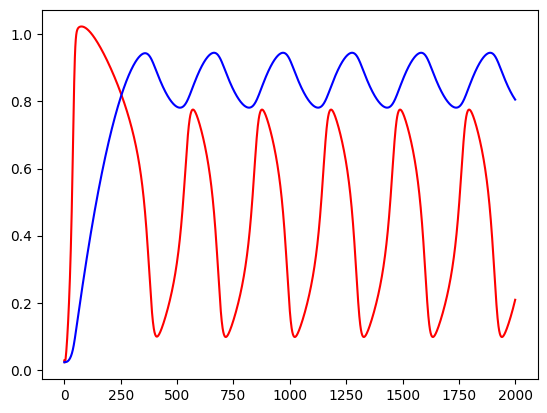

In [66]:
T =  200.


fhn = FHNModel()
fhn.params.duration = T
fhn.params.dt = 0.1
fhn.params.sigma_ou = 0.0

fhn.params.x_ext = 0.
fhn.params.y_ext = 0.
fhn.params.x_ou_mean = 1.
fhn.params.y_ou_mean = 0.
fhn.run()

plt.plot(fhn.x[0,:], color="red")
plt.plot(fhn.y[0,:], color="blue")
plt.show()

[0. 0.]


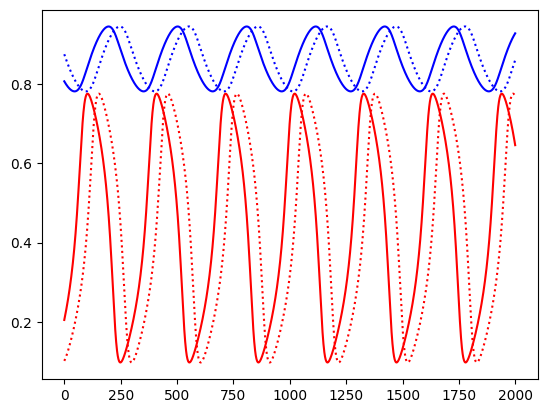

In [96]:
T =  200.
N = 2
cmat = np.zeros((N,N))
cmat[1,0] = 1.


fhn = FHNModel(Cmat=cmat, Dmat=100. * cmat)
fhn.params.duration = T
fhn.params.dt = 0.1
fhn.params.sigma_ou = 0.0

fhn.params.x_ext = 0.
fhn.params.y_ext = 0.
fhn.params.x_ou_mean = 1.
fhn.params.y_ou_mean = 0.
fhn.params.xs_init = np.array( [[0.0], [0.0]] )
fhn.params.ys_init = np.array( [[0.0]] )
fhn.run()

nmaxdel = fhn.getMaxDelay()

fhn.params.xs_init = np.array( [ fhn.x[0,-nmaxdel-1:], fhn.x[1,-nmaxdel-1:] ] )
fhn.params.ys_init = np.array( [ fhn.y[0,-nmaxdel-1:], fhn.y[1,-nmaxdel-1:] ] )
fhn.params.x_ou = np.array( [ fhn.state["x_ou"][0], fhn.state["x_ou"][1] ] )
fhn.params.y_ou = np.array( [ fhn.state["y_ou"][0], fhn.state["y_ou"][1] ] )

print(fhn.params.y_ou)
fhn.run()

time = np.arange(0, T, fhn.params.dt)

uzero = np.zeros((N, 2, fhn.x.shape[1]))
#u[0,:] = np.sin(2.*np.pi*np.arange(0,T, fhn.params.dt)/target_period)
fhn.params.x_ext = 0.
fhn.run()

plt.plot(fhn.x[0,:], color="red")
plt.plot(fhn.x[1,:], color="red", linestyle=":")
plt.plot(fhn.y[0,:], color="blue")
plt.plot(fhn.y[1,:], color="blue", linestyle=":")
plt.show()

Optimal control with target time series


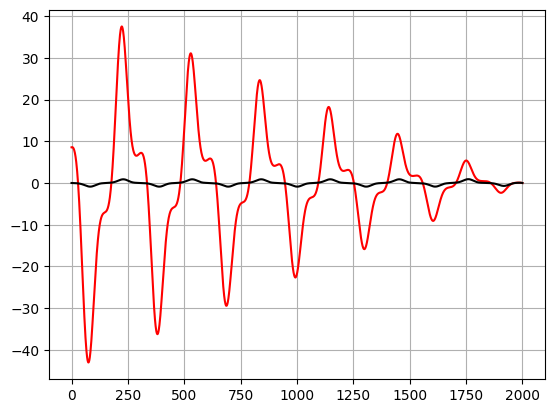

In [76]:
target = np.zeros(( N, 2, fhn.x.shape[1]+1 ))
target[0,0,1:] = fhn.x[0,:]
target[0,0,0] = fhn.params.xs_init[0,-1]
target[1,0,1:] = fhn.x[0,:]
target[1,0,0] = fhn.params.xs_init[0,-1]
target[0,1,1:] = fhn.y[0,:]
target[0,1,0] = fhn.params.ys_init[0,-1]
target[1,1,1:] = fhn.y[0,:]
target[1,1,0] = fhn.params.ys_init[0,-1]
fhn.params.x_ext = 0.

fhn_controlled = oc_fhn.OcFhn(fhn, target, print_array=np.arange(0,1000,100), cost_interval=(0,None))
fhn_controlled.weights["w_2"] = 0.
fhn_controlled.weights["w_p"] = 1.
fhn_controlled.weights["w_f"] = 0.

if True:
    grad_an = fhn_controlled.compute_gradient()
    grad_num = fhn_controlled.compute_gradient_num()

    plt.plot(grad_an[1,0,:], color="red")
    plt.plot(grad_num[1,0,:], color="black")
    plt.grid()
    plt.show()

Optimal control with target time series
diffusive
Compute control for a deterministic system
Cost in iteration 0: 6.236263262684077
Cost in iteration 100: 0.09838489882873155
Cost in iteration 200: 0.0982977935261557
Cost in iteration 300: 0.09827057268439367
Cost in iteration 400: 0.09825651452142178
Cost in iteration 500: 0.09824830323264247
Cost in iteration 600: 0.09824290430476249
Cost in iteration 700: 0.09823915752087914
Cost in iteration 800: 0.0982364571923856
Cost in iteration 900: 0.09823443316250076
Final cost : 0.09823286450207355
Compute control for a deterministic system
Cost in iteration 0: 0.09823286450207355
Cost in iteration 100: 0.09823185508781938
Cost in iteration 200: 0.09823101541493656
Cost in iteration 300: 0.0982303087901762
Cost in iteration 400: 0.09822971137749531
Cost in iteration 500: 0.0982292050818754
Cost in iteration 600: 0.0982287725732127
Cost in iteration 700: 0.09822839910246917
Cost in iteration 800: 0.09822807447871301
Cost in iteration 900: 0.

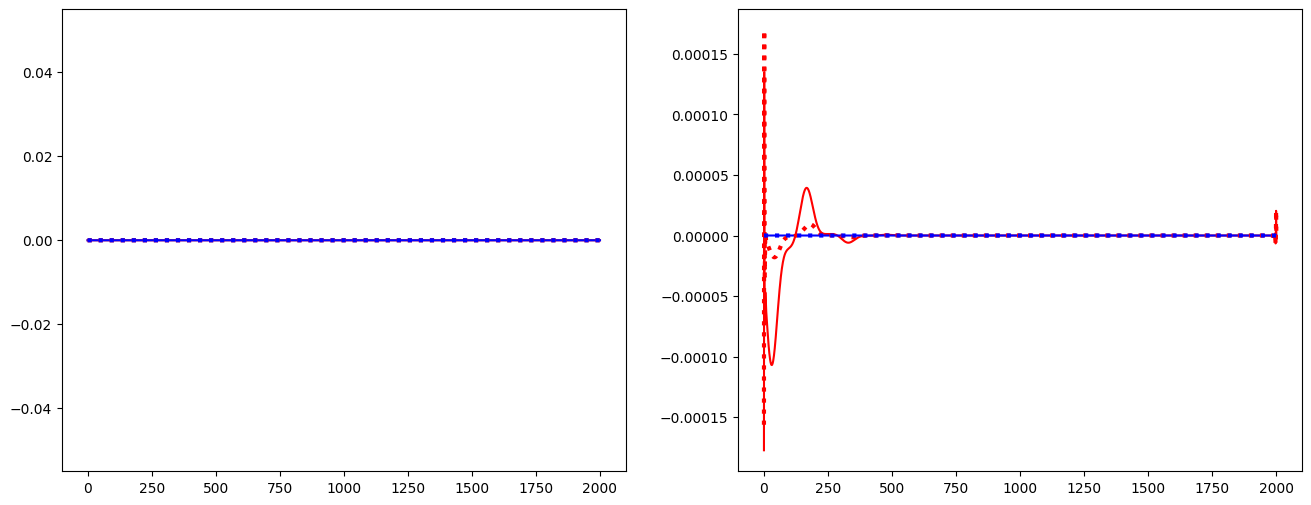

Compute control for a deterministic system
Cost in iteration 0: 0.09822620655166692
Cost in iteration 100: 0.09822613527571492
Cost in iteration 200: 0.09822607337471222
Cost in iteration 300: 0.09822601902101216
Cost in iteration 400: 0.09822596973448469
Cost in iteration 500: 0.098225927518489
Cost in iteration 600: 0.0982258896467208
Cost in iteration 700: 0.09822585713515249
Cost in iteration 800: 0.0982258273326608
Cost in iteration 900: 0.09822580093400224
Final cost : 0.09822577865653054
Compute control for a deterministic system
Cost in iteration 0: 0.09822577865653054
Cost in iteration 100: 0.09822576177594657
Cost in iteration 200: 0.09822574657287385
Cost in iteration 300: 0.09822573254880308
Cost in iteration 400: 0.09822571991211078
Cost in iteration 500: 0.09822570840393452
Cost in iteration 600: 0.09822569791640202
Cost in iteration 700: 0.09822568836867224
Cost in iteration 800: 0.09822567851999957
Cost in iteration 900: 0.09822566937756948
Final cost : 0.09822566118374

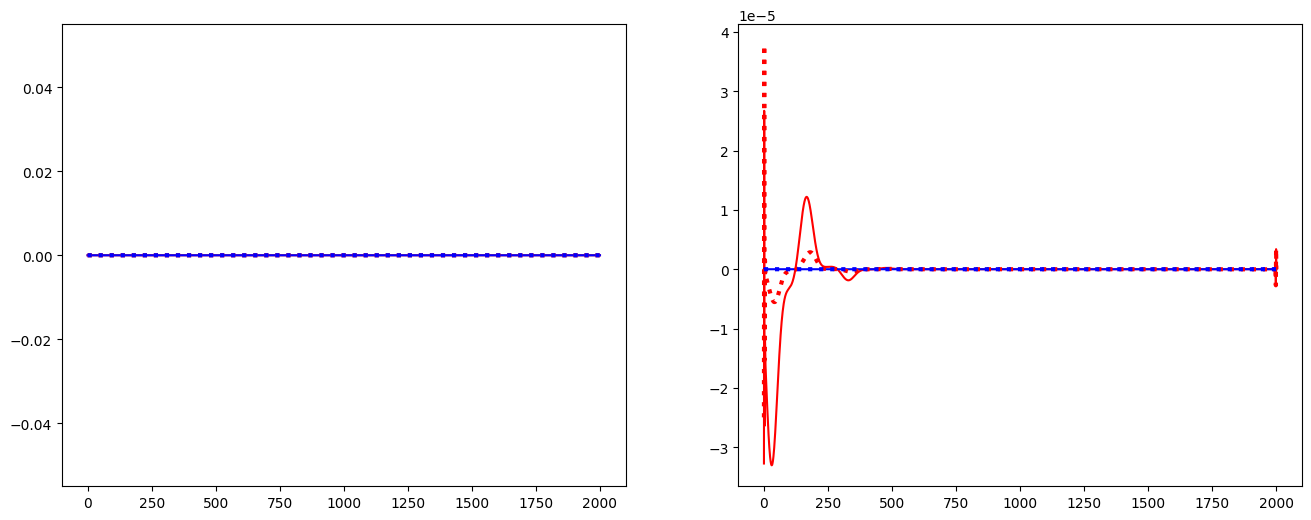

Compute control for a deterministic system
Cost in iteration 0: 0.09822561547067586
Cost in iteration 100: 0.0982256125163895
Cost in iteration 200: 0.09822560974163831
Cost in iteration 300: 0.098225607336064
Cost in iteration 400: 0.0982256050858505
Cost in iteration 500: 0.09822560308461518
Cost in iteration 600: 0.09822560125520484
Cost in iteration 700: 0.09822559957625583
Cost in iteration 800: 0.09822559811139302
Cost in iteration 900: 0.09822559672567865
Final cost : 0.09822559558031076
Compute control for a deterministic system
Cost in iteration 0: 0.09822559558031076
Cost in iteration 100: 0.09822559468800117
Cost in iteration 200: 0.09822559382103832
Cost in iteration 300: 0.09822559294190576
Cost in iteration 400: 0.09822559214158799
Cost in iteration 500: 0.09822559141022297
Cost in iteration 600: 0.09822559074020198
Cost in iteration 700: 0.09822559012913709
Cost in iteration 800: 0.09822558958171966
Cost in iteration 900: 0.09822558908112687
Final cost : 0.09822558863742

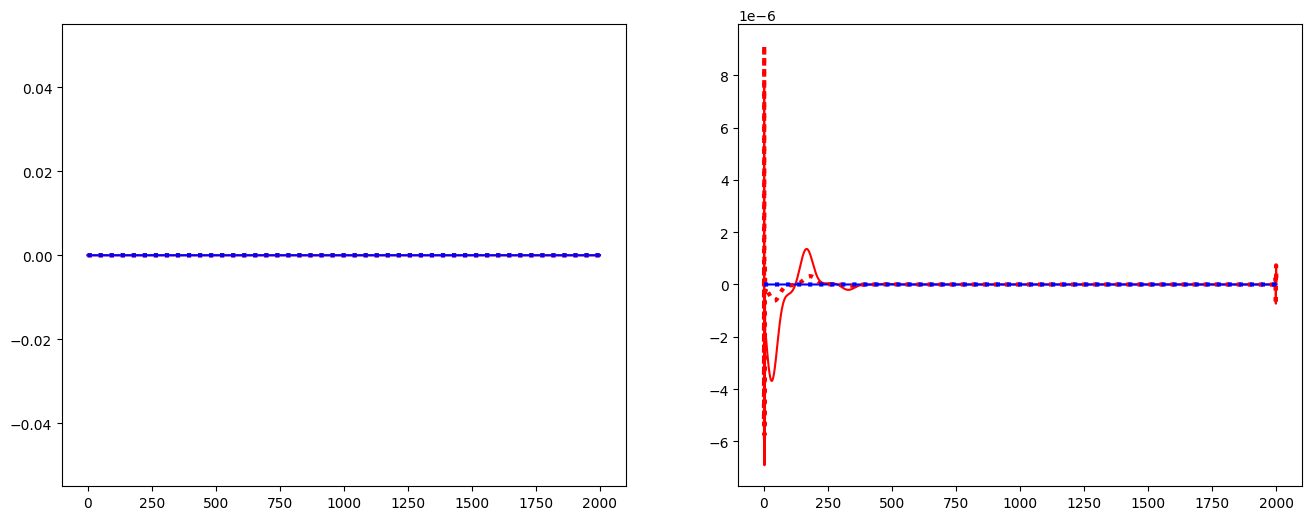

Compute control for a deterministic system
Cost in iteration 0: 0.0982255859540724
Cost in iteration 100: 0.0982255857769007
Cost in iteration 200: 0.09822558561033085
Cost in iteration 300: 0.09822558545449983
Cost in iteration 400: 0.09822558530839698
Cost in iteration 500: 0.09822558517619369
Cost in iteration 600: 0.09822558505524853
Cost in iteration 700: 0.09822558494308072
Cost in iteration 800: 0.09822558484345709
Cost in iteration 900: 0.09822558475536795
Final cost : 0.0982255846732504
Compute control for a deterministic system
Cost in iteration 0: 0.0982255846732504
Cost in iteration 100: 0.09822558460178606
Cost in iteration 200: 0.09822558453256917
Cost in iteration 300: 0.09822558447427975
Cost in iteration 400: 0.09822558441413139
Cost in iteration 500: 0.09822558436113317
Cost in iteration 600: 0.09822558431487385
Cost in iteration 700: 0.09822558427923697
Cost in iteration 800: 0.09822558423997436
Cost in iteration 900: 0.0982255842041331
Final cost : 0.098225584171543

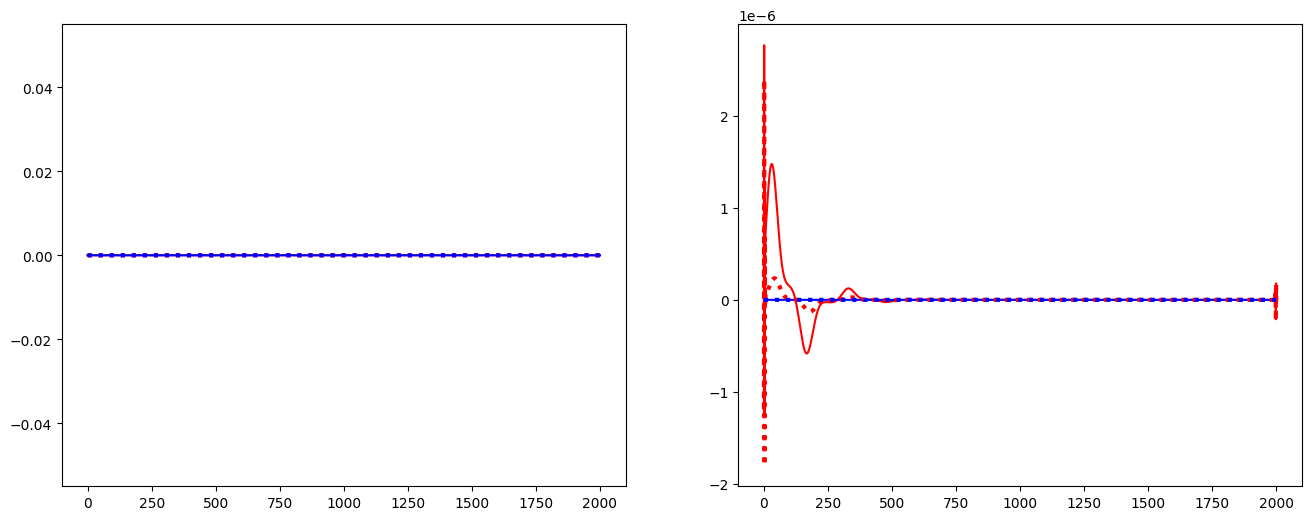

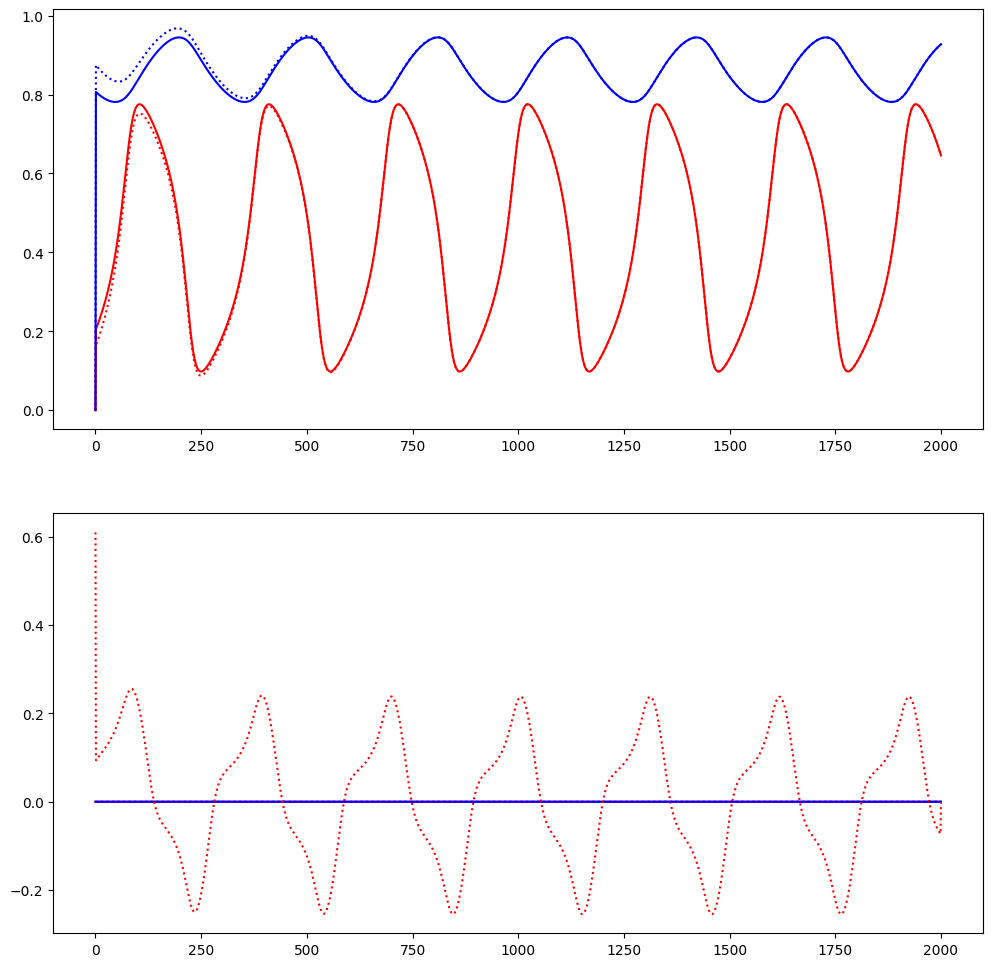

In [104]:
controlmat = np.zeros((2,2))
controlmat[1,0] = 1
fhn.params.x_ext = 0.#u_rect[:,0,:]

fhn_controlled = oc_fhn.OcFhn(fhn, target, print_array=np.arange(0,1000,100), cost_interval=(0,None),
                              control_matrix=controlmat)
fhn_controlled.weights["w_2"] = 0.
fhn_controlled.weights["w_p"] = 1.

for k in range(4):
    for exp in np.arange(-3, 3, 2):
        fhn_controlled.zero_step_encountered = False
        fhn_controlled.step = 10.**exp
        fhn_controlled.optimize(1000)

    if True:
        grad_an = fhn_controlled.compute_gradient()
        grad_num = fhn_controlled.compute_gradient_num()

        fig, ax = plt.subplots(1,2, figsize=(16,6))
        ax[0].plot(grad_an[0,0,:], color="red")
        ax[0].plot(grad_an[0,1,:], color="blue")
        ax[1].plot(grad_an[1,0,:], color="red")
        ax[1].plot(grad_an[1,1,:], color="blue")
        ax[0].plot(controlmat[0,0] * grad_num[0,0,:], color="red", linestyle=":", linewidth=3)
        ax[0].plot(controlmat[0,1] * grad_num[0,1,:], color="blue", linestyle=":", linewidth=3)
        ax[1].plot(controlmat[1,0] * grad_num[1,0,:], color="red", linestyle=":", linewidth=3)
        ax[1].plot(controlmat[1,1] * grad_num[1,1,:], color="blue", linestyle=":", linewidth=3)
        plt.show()

xs = fhn_controlled.get_xs()
control = fhn_controlled.control

fig, ax = plt.subplots(2,1, figsize=(12,12))
ax[0].plot(xs[0,0,:], color="red")
ax[0].plot(xs[0,1,:], color="blue")
ax[0].plot(xs[1,0,:], color="red", linestyle=":")
ax[0].plot(xs[1,1,:], color="blue", linestyle=":")

ax[1].plot(control[0,0,:], color="red")
ax[1].plot(control[0,1,:], color="blue")
ax[1].plot(control[1,0,:], color="red", linestyle=":")
ax[1].plot(control[1,1,:], color="blue", linestyle=":")
plt.show()

u_cos_opt = fhn_controlled.control[:,:,:]

Optimal control with target time series


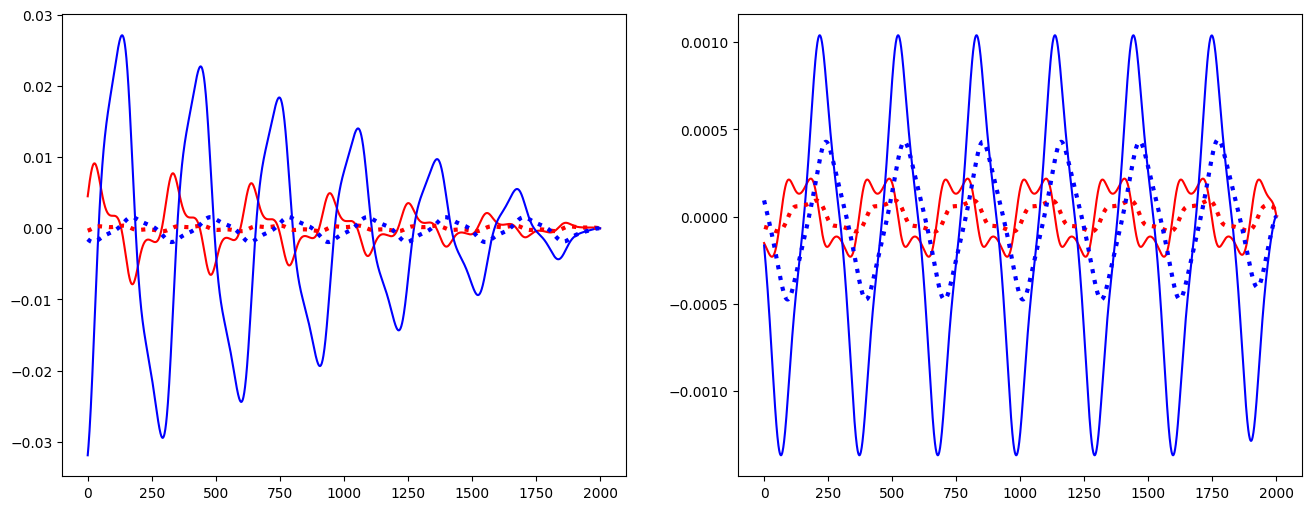

Compute control for a deterministic system
Cost in iteration 0: 0.003067342431481657
Final cost : 0.003067342431481657


In [102]:
ui = 0 
fhn.params.x_ext = uzero[:,0,:]
fhn.params.y_ext = uzero[:,1,:]

fhn_controlled = oc_fhn.OcFhn(fhn, target, print_array=np.arange(0,1000,100),
                                cost_interval=(0,None))

fhn_controlled.weights["w_2"] = 0.
fhn_controlled.weights["w_p"] = 0.
fhn_controlled.weights["w_cc"] = 1.

#plt.plot(fhn_controlled.get_xs()[0,0,:], color="red")
#plt.plot(fhn_controlled.get_xs()[1,0,:], color="red", linestyle=":")
#plt.show()

for k in range(1):
    grad_an = fhn_controlled.compute_gradient()
    grad_num = fhn_controlled.compute_gradient_num()

    fig, ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].plot(grad_an[0,0,:], color="red")
    ax[0].plot(grad_an[0,1,:], color="blue")
    ax[1].plot(grad_an[1,0,:], color="red")
    ax[1].plot(grad_an[1,1,:], color="blue")
    ax[0].plot(grad_num[0,0,:], color="red", linestyle=":", linewidth=3)
    ax[0].plot(grad_num[0,1,:], color="blue", linestyle=":", linewidth=3)
    ax[1].plot(grad_num[1,0,:], color="red", linestyle=":", linewidth=3)
    ax[1].plot(grad_num[1,1,:], color="blue", linestyle=":", linewidth=3)
    plt.show()

    fhn_controlled.optimize(0)

xs = fhn_controlled.get_xs()
control = fhn_controlled.control

if False:
    fig, ax = plt.subplots(2,1, figsize=(12,12))
    ax[0].plot(xs[0,0,:], color="red")
    ax[0].plot(xs[0,1,:], color="blue")
    ax[0].plot(xs[1,0,:], color="red", linestyle=":")
    ax[0].plot(xs[1,1,:], color="blue", linestyle=":")

    ax[1].plot(control[0,0,:], color="red")
    ax[1].plot(control[0,1,:], color="blue")
    ax[1].plot(control[1,0,:], color="red", linestyle=":")
    ax[1].plot(control[1,1,:], color="blue", linestyle=":")
    plt.show()

Optimal control with target oscillation period


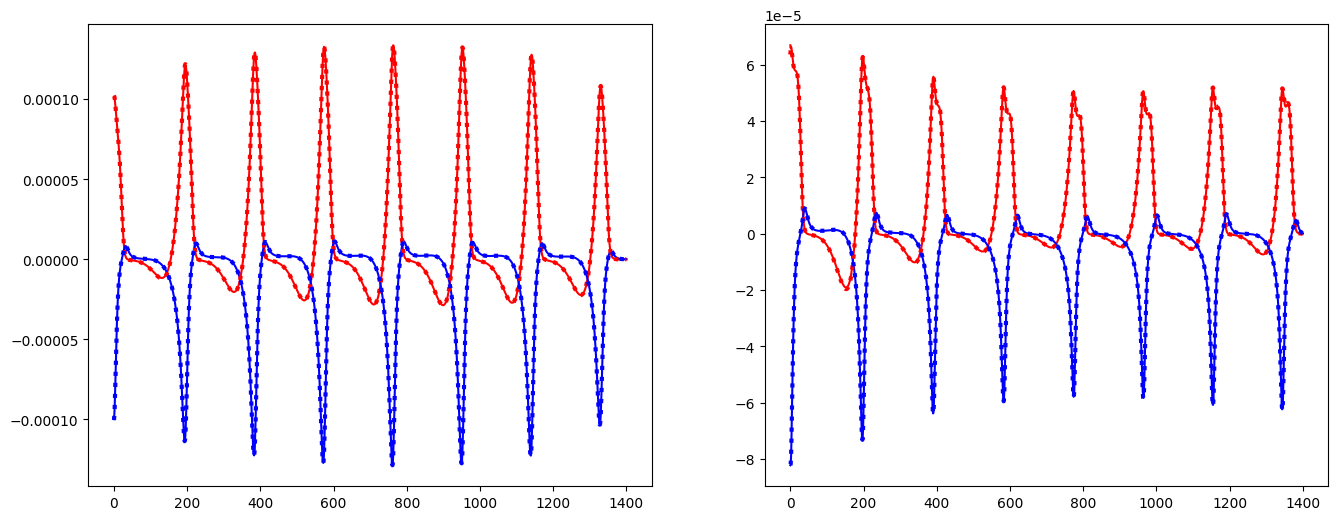

Compute control for a deterministic system
Cost in iteration 0: 0.0011865778790710116
Cost in iteration 100: 0.0007141066013459996
Cost in iteration 200: 0.0006891434704854035
Cost in iteration 300: 0.0006737675682758914
Cost in iteration 400: 0.0006626010164328182
Cost in iteration 500: 0.000653551361014928
Cost in iteration 600: 0.0006464988994072903
Cost in iteration 700: 0.0006408551241673273
Cost in iteration 800: 0.0006356735006783145
Cost in iteration 900: 0.0006306403090738887
Final cost : 0.0006265848095335776


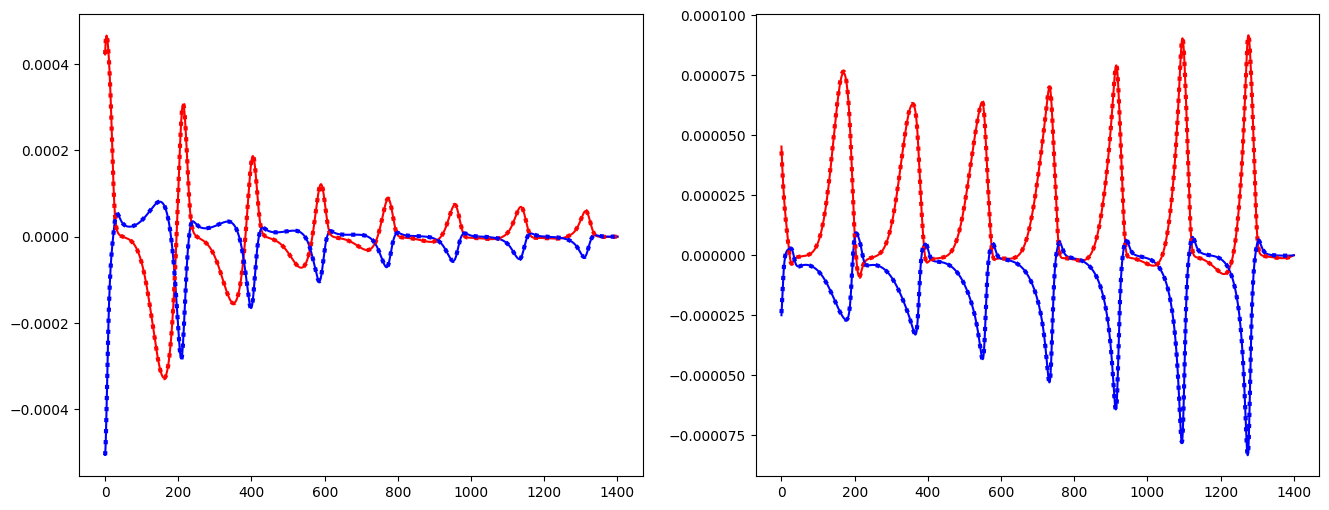

Compute control for a deterministic system
Cost in iteration 0: 0.0006265848095335776
Cost in iteration 100: 0.0006228952360717427
Cost in iteration 200: 0.000619605202122056
Cost in iteration 300: 0.0006166877485669201
Cost in iteration 400: 0.0006140737812552848
Cost in iteration 500: 0.0006115154940377389
Cost in iteration 600: 0.0006088445012529522
Cost in iteration 700: 0.000606222563937966
Cost in iteration 800: 0.0006040774276410395
Cost in iteration 900: 0.0006020356077754698
Final cost : 0.0006001125614035377


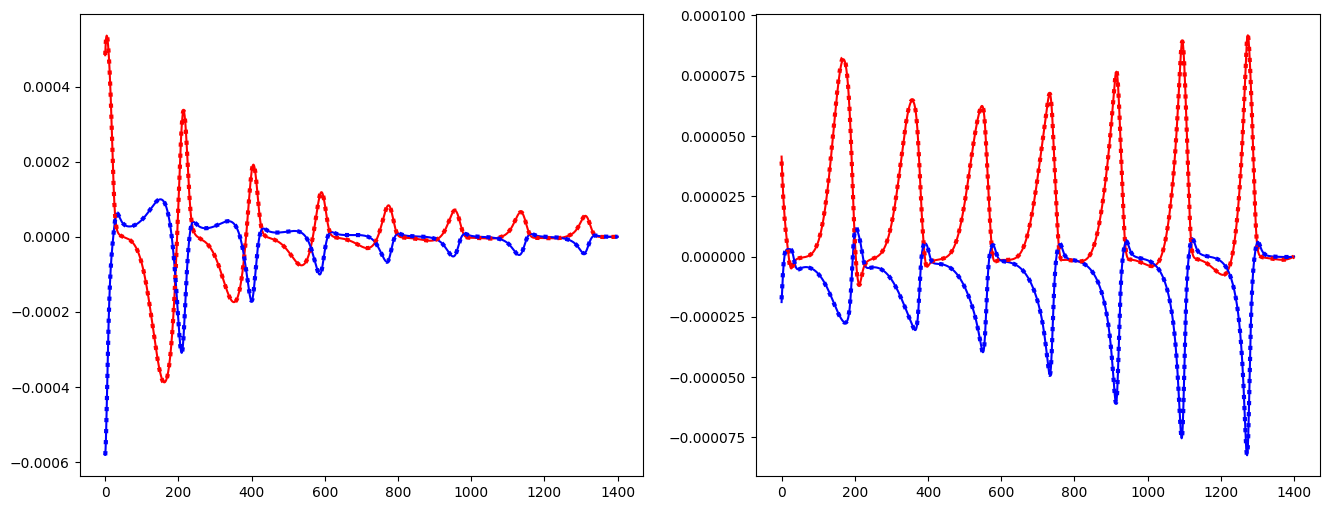

Compute control for a deterministic system
Cost in iteration 0: 0.0006001125614035377
Cost in iteration 100: 0.0005982739437108465
Cost in iteration 200: 0.0005965291617860285
Cost in iteration 300: 0.0005948940872682822
Cost in iteration 400: 0.000593355256056306
Cost in iteration 500: 0.0005919068457610505
Cost in iteration 600: 0.0005905494768901726
Cost in iteration 700: 0.0005892736017833141
Cost in iteration 800: 0.0005880187272653201
Cost in iteration 900: 0.0005866698413032776
Final cost : 0.0005853948605306087


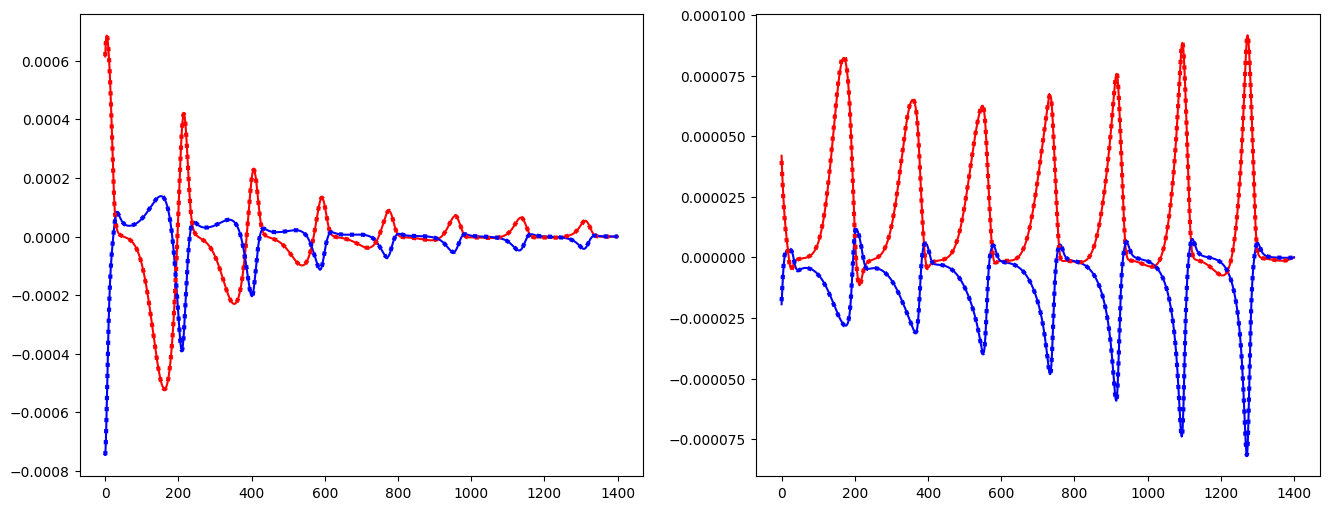

Compute control for a deterministic system
Cost in iteration 0: 0.0005853948605306087
Cost in iteration 100: 0.0005840304977316719
Cost in iteration 200: 0.0005826141163018506
Cost in iteration 300: 0.0005814262656725804
Cost in iteration 400: 0.0005803202037951013
Cost in iteration 500: 0.0005792694083486812
Cost in iteration 600: 0.0005782446974904017
Cost in iteration 700: 0.0005772531811021561
Cost in iteration 800: 0.0005762843544612471
Cost in iteration 900: 0.0005753360782354024
Final cost : 0.0005744247469761606


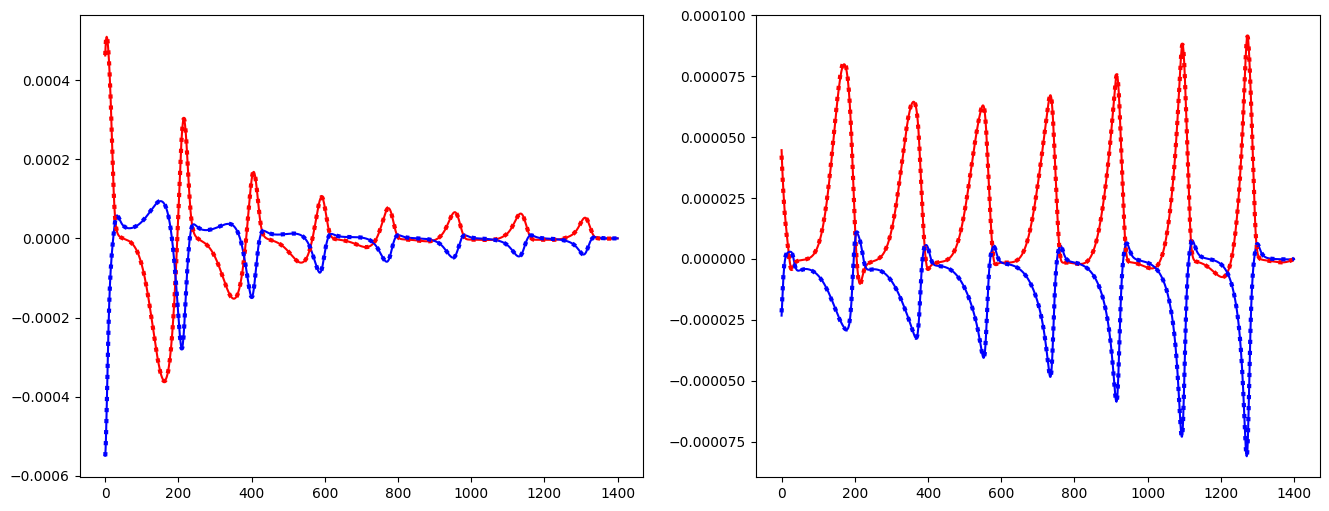

Compute control for a deterministic system
Cost in iteration 0: 0.0005744247469761606
Cost in iteration 100: 0.0005735380610882675
Cost in iteration 200: 0.0005726680589189275
Cost in iteration 300: 0.0005718376925276446
Cost in iteration 400: 0.0005710220019701118
Cost in iteration 500: 0.0005702347422317748
Cost in iteration 600: 0.0005694732284747214
Cost in iteration 700: 0.0005687380482079475
Cost in iteration 800: 0.0005680213175530584
Cost in iteration 900: 0.0005673298291352818
Final cost : 0.0005666611172289171


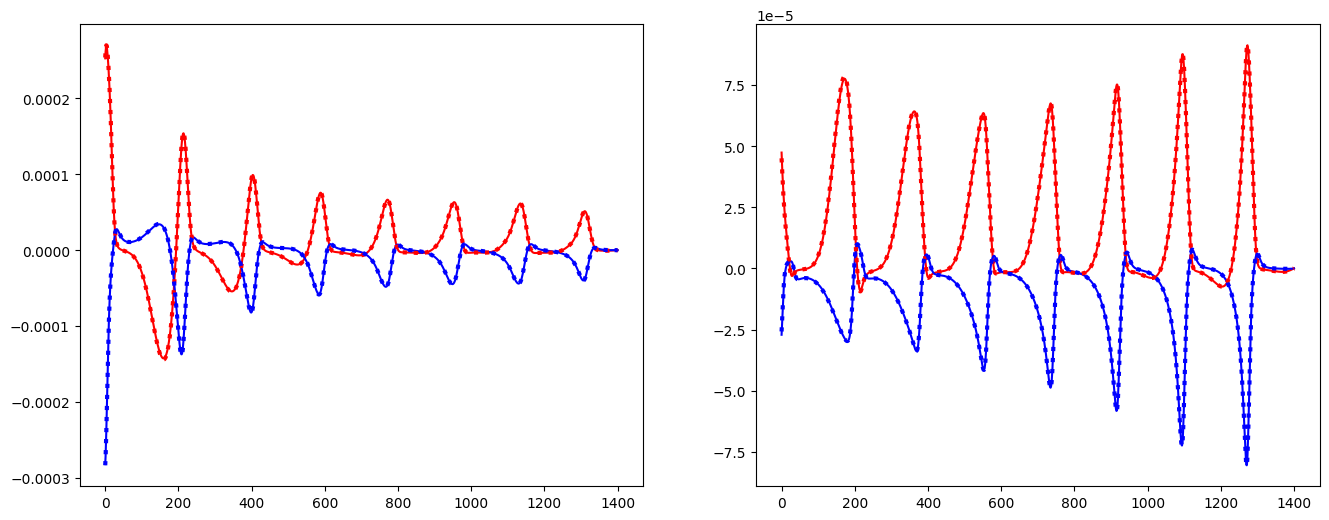

Compute control for a deterministic system
Cost in iteration 0: 0.0005666611172289171
Cost in iteration 100: 0.0005660134174759643
Cost in iteration 200: 0.0005653872999421781
Cost in iteration 300: 0.000564764117710814
Cost in iteration 400: 0.0005641220445499985
Cost in iteration 500: 0.0005634733715294579
Cost in iteration 600: 0.0005628428253709608
Cost in iteration 700: 0.0005621883143040528
Cost in iteration 800: 0.0005615337005231191
Cost in iteration 900: 0.0005608655285007588
Final cost : 0.000560181552799287


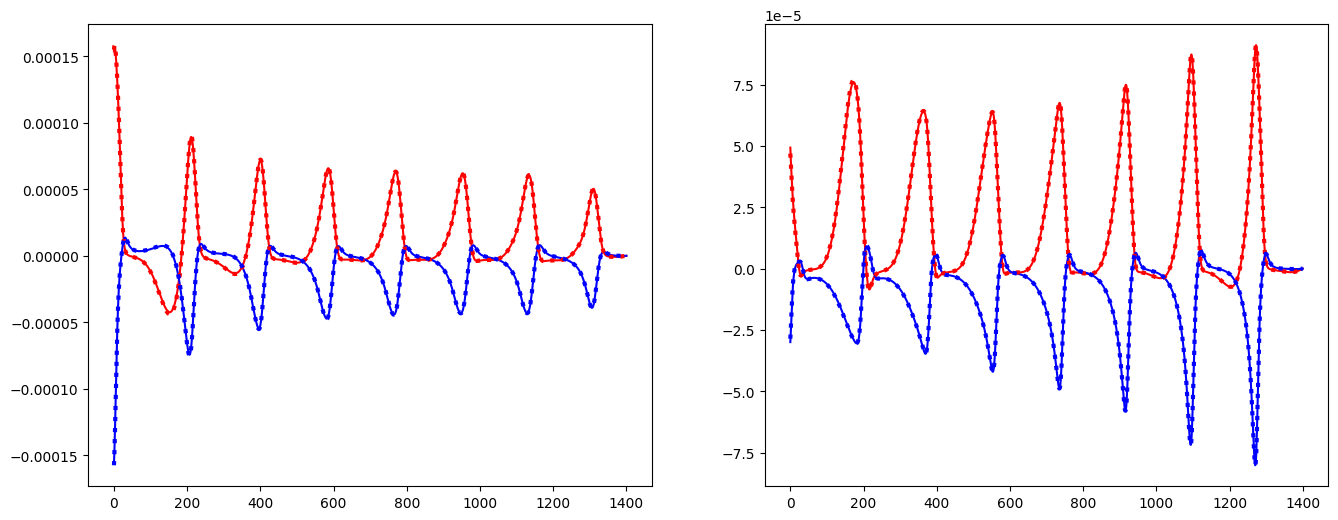

Compute control for a deterministic system
Cost in iteration 0: 0.000560181552799287
Cost in iteration 100: 0.0005594813206594184
Cost in iteration 200: 0.0005588183590945593
Cost in iteration 300: 0.0005582479826700801
Cost in iteration 400: 0.0005576723146169869
Cost in iteration 500: 0.0005571300072479741
Cost in iteration 600: 0.0005565987622261736
Cost in iteration 700: 0.0005560758626604492
Cost in iteration 800: 0.0005555600537182241
Cost in iteration 900: 0.0005550547728769171
Final cost : 0.000554550899971331


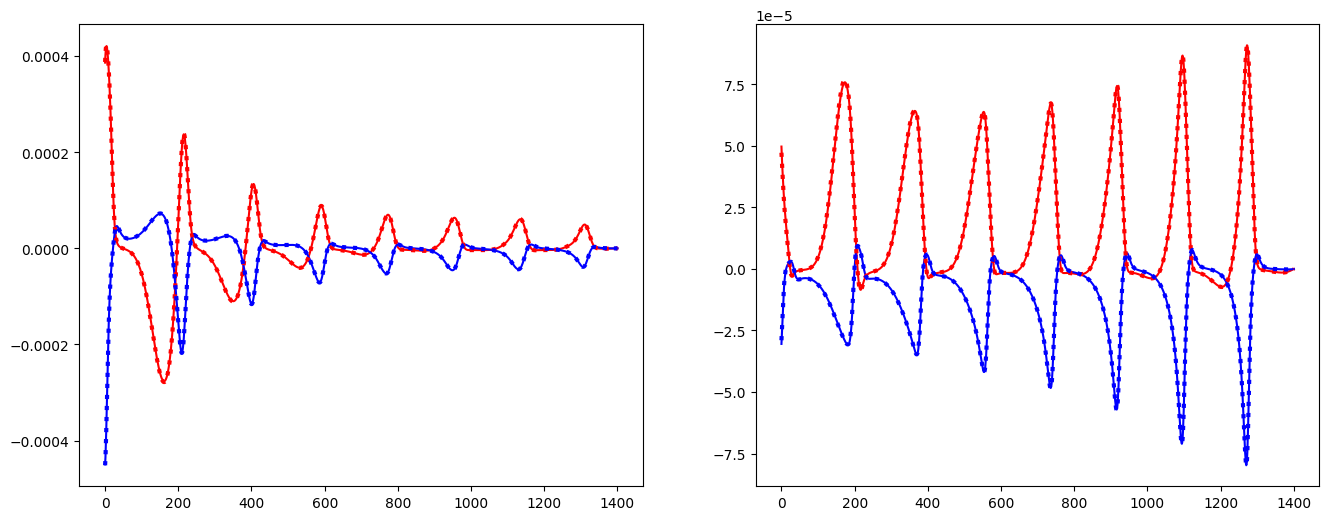

Compute control for a deterministic system
Cost in iteration 0: 0.000554550899971331
Cost in iteration 100: 0.0005540577182353594
Cost in iteration 200: 0.0005535672959998427
Cost in iteration 300: 0.0005530916325344917
Cost in iteration 400: 0.0005526182269301412
Cost in iteration 500: 0.0005521470995589289
Cost in iteration 600: 0.0005516882530898437
Cost in iteration 700: 0.0005512374418582016
Cost in iteration 800: 0.0005507931702992824
Cost in iteration 900: 0.0005503511640330528
Final cost : 0.0005499222517728774


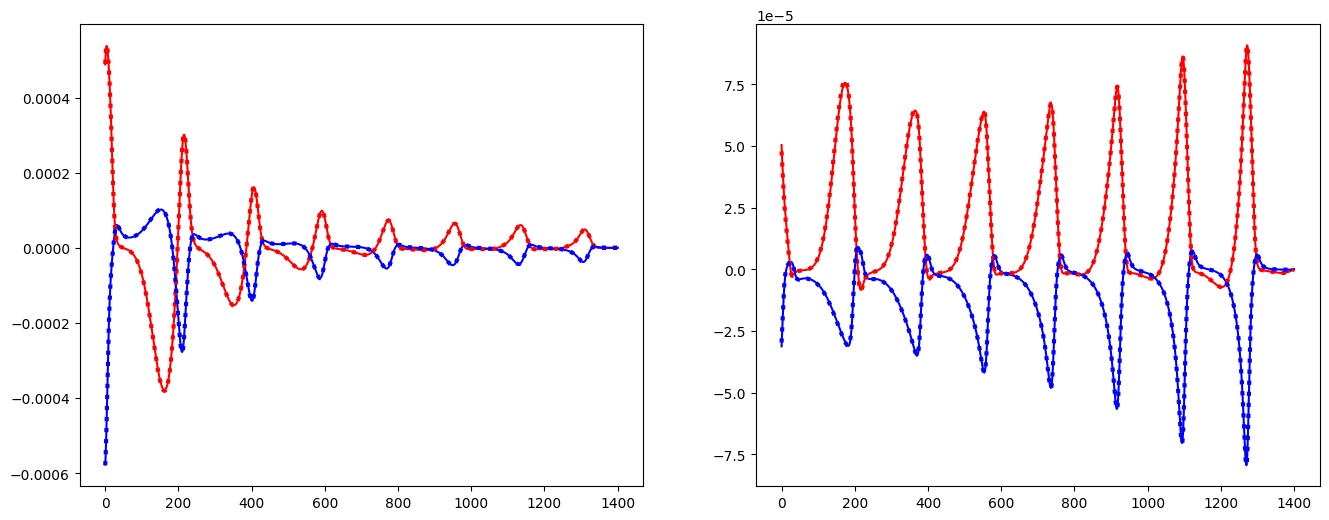

Compute control for a deterministic system
Cost in iteration 0: 0.0005499222517728774
Cost in iteration 100: 0.0005494955205193415
Cost in iteration 200: 0.0005490776331640187
Cost in iteration 300: 0.0005486679319401103
Cost in iteration 400: 0.0005482597621354274
Cost in iteration 500: 0.0005478627956405015
Cost in iteration 600: 0.0005474694331578855
Cost in iteration 700: 0.0005470839715408501
Cost in iteration 800: 0.0005467058054502605
Cost in iteration 900: 0.0005463319393207162
Final cost : 0.0005459648337807873


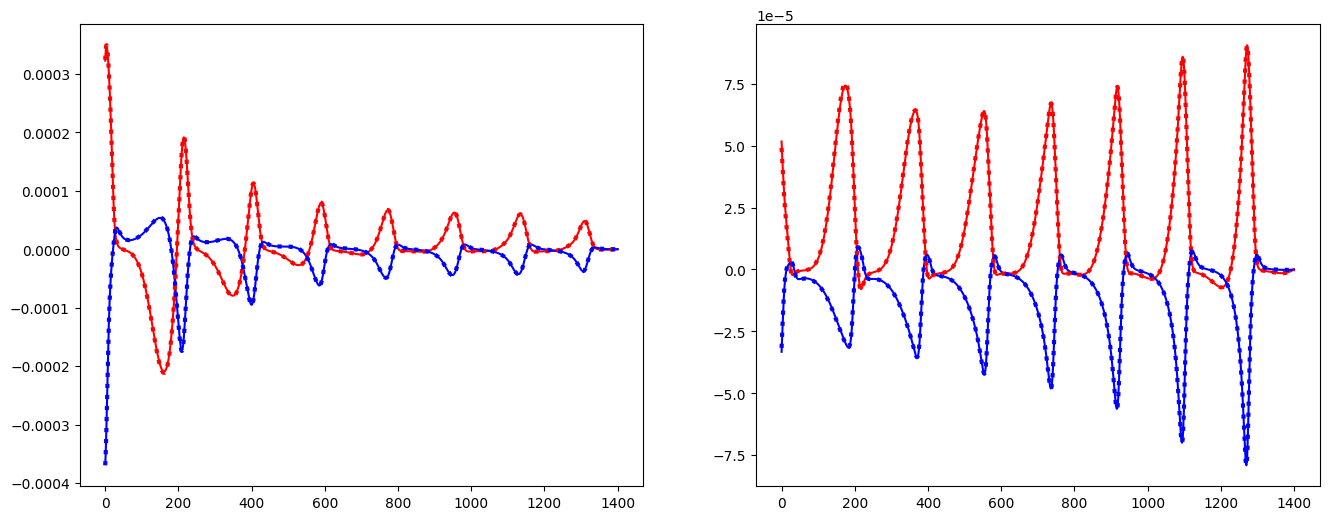

Compute control for a deterministic system
Cost in iteration 0: 0.0005459648337807873
Cost in iteration 100: 0.0005456041530437728
Cost in iteration 200: 0.0005452497691550476
Cost in iteration 300: 0.0005449029167398517
Cost in iteration 400: 0.0005445586357570492
Cost in iteration 500: 0.0005442214148860917
Cost in iteration 600: 0.0005438905848648509
Cost in iteration 700: 0.0005435668603556039
Cost in iteration 800: 0.0005432448388154661
Cost in iteration 900: 0.0005429325516245257
Final cost : 0.0005426215329486649


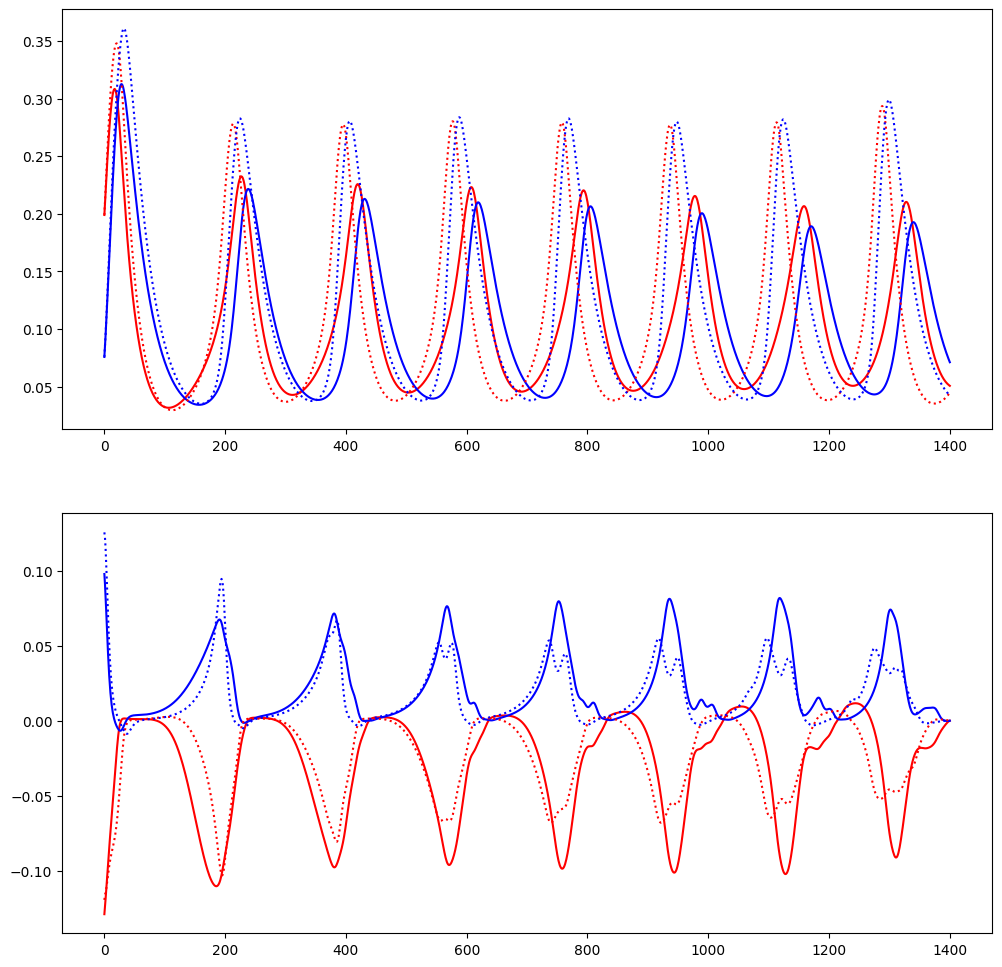

In [51]:
ui = 0 
fhn.params.x_ext = uzero

fhn_controlled = oc_fhn.OcFhn(fhn, target_period, print_array=np.arange(0,1000,100),
                                cost_interval=(0,None), control_interval=(0,None), grad_method=0)
fhn_controlled.weights["w_2"] = 0.
fhn_controlled.weights["w_p"] = 0.
fhn_controlled.weights["w_cc"] = 1.

#plt.plot(fhn_controlled.get_xs()[0,0,:], color="red")
#plt.plot(fhn_controlled.get_xs()[1,0,:], color="red", linestyle=":")
#plt.show()

for k in range(10):
    grad_an = fhn_controlled.compute_gradient()
    grad_num = fhn_controlled.compute_gradient_num()

    fig, ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].plot(grad_an[0,0,:], color="red")
    ax[0].plot(grad_an[0,1,:], color="blue")
    ax[1].plot(grad_an[1,0,:], color="red")
    ax[1].plot(grad_an[1,1,:], color="blue")
    ax[0].plot(grad_num[0,0,:], color="red", linestyle=":", linewidth=3)
    ax[0].plot(grad_num[0,1,:], color="blue", linestyle=":", linewidth=3)
    ax[1].plot(grad_num[1,0,:], color="red", linestyle=":", linewidth=3)
    ax[1].plot(grad_num[1,1,:], color="blue", linestyle=":", linewidth=3)
    plt.show()

    fhn_controlled.optimize(1000)

xs = fhn_controlled.get_xs()
control = fhn_controlled.control

if True:
    fig, ax = plt.subplots(2,1, figsize=(12,12))
    ax[0].plot(xs[0,0,:], color="red")
    ax[0].plot(xs[0,1,:], color="blue")
    ax[0].plot(xs[1,0,:], color="red", linestyle=":")
    ax[0].plot(xs[1,1,:], color="blue", linestyle=":")

    ax[1].plot(control[0,0,:], color="red")
    ax[1].plot(control[0,1,:], color="blue")
    ax[1].plot(control[1,0,:], color="red", linestyle=":")
    ax[1].plot(control[1,1,:], color="blue", linestyle=":")
    plt.show()

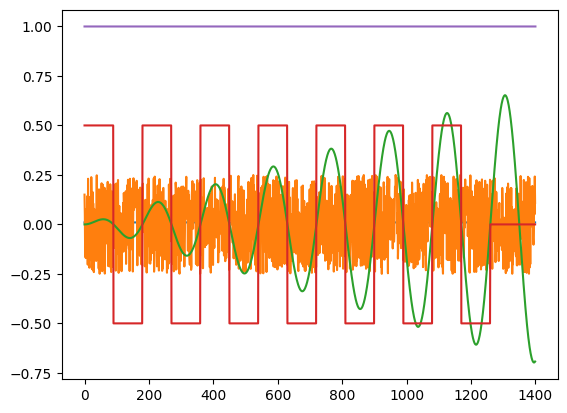

In [32]:
u_rand = np.zeros((uzero.shape))
u_rand[0,0,:] = 0.5 * np.random.rand(uzero.shape[2]) - 0.25

u_sine = np.zeros((uzero.shape))
u_sine[0,0,:] = np.sin(2.*np.pi*np.arange(0,T, fhn.params.dt)/target_period)
for t in range(u_sine.shape[2]):
    u_sine[0,0,t] *= 1e-3 * t / u_sine.shape[1]

u_rect = np.zeros((uzero.shape))
i = 0
while i < uzero.shape[2]-200:
    u_rect[0,0,i:i+90] = 0.5
    u_rect[0,0,i+90:i+180] = -0.5
    i += 180

u_inits = [0.01 * np.ones(uzero.shape), u_rand, u_sine, u_rect, u_cos_opt]
res_cost = np.zeros(( 3, len(u_inits)))
res_control = [[None for x0 in range(res_cost.shape[1])] for x1 in range(3) ]
res_state = [[None for x0 in range(res_cost.shape[1])] for x1 in range(3) ]

for u_ in u_inits:
    plt.plot(u_[0,0,:])

plt.show()

Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -54.656796456546296
Converged in iteration 42 with cost -69.7170487519128
Final cost : -69.7170487519128
Compute control for a deterministic system
Cost in iteration 0: -69.7170487519128
Converged in iteration 6 with cost -69.71704875191291
Final cost : -69.71704875191291
Compute control for a deterministic system
Cost in iteration 0: -69.71704875191291
Converged in iteration 4 with cost -69.71704875191294
Final cost : -69.71704875191294
Compute control for a deterministic system
Cost in iteration 0: -69.71704875191294
Converged in iteration 1 with cost -69.71704875191294
Final cost : -69.71704875191294
Compute control for a deterministic system
Cost in iteration 0: -69.71704875191294
Converged in iteration 1 with cost -69.71704875191294
Final cost : -69.71704875191294
Compute control for a deterministic system
Cost in iteration 0: -69.71704875191294
Converged in iteration 1 w

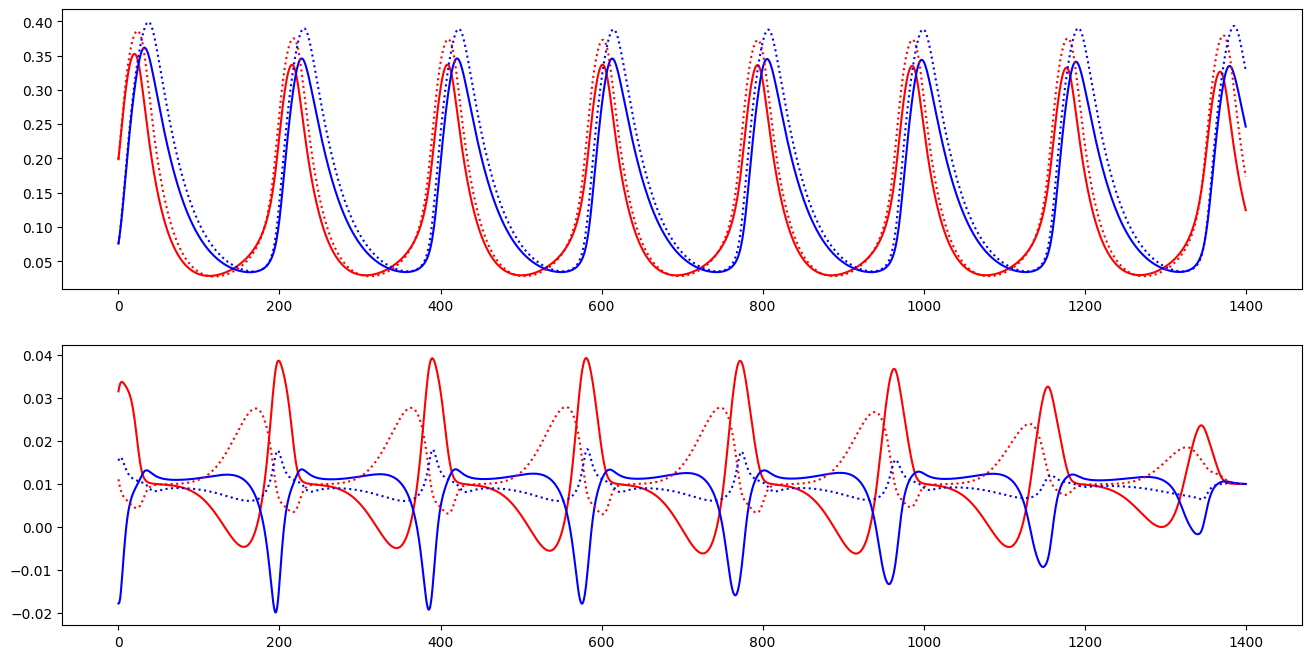

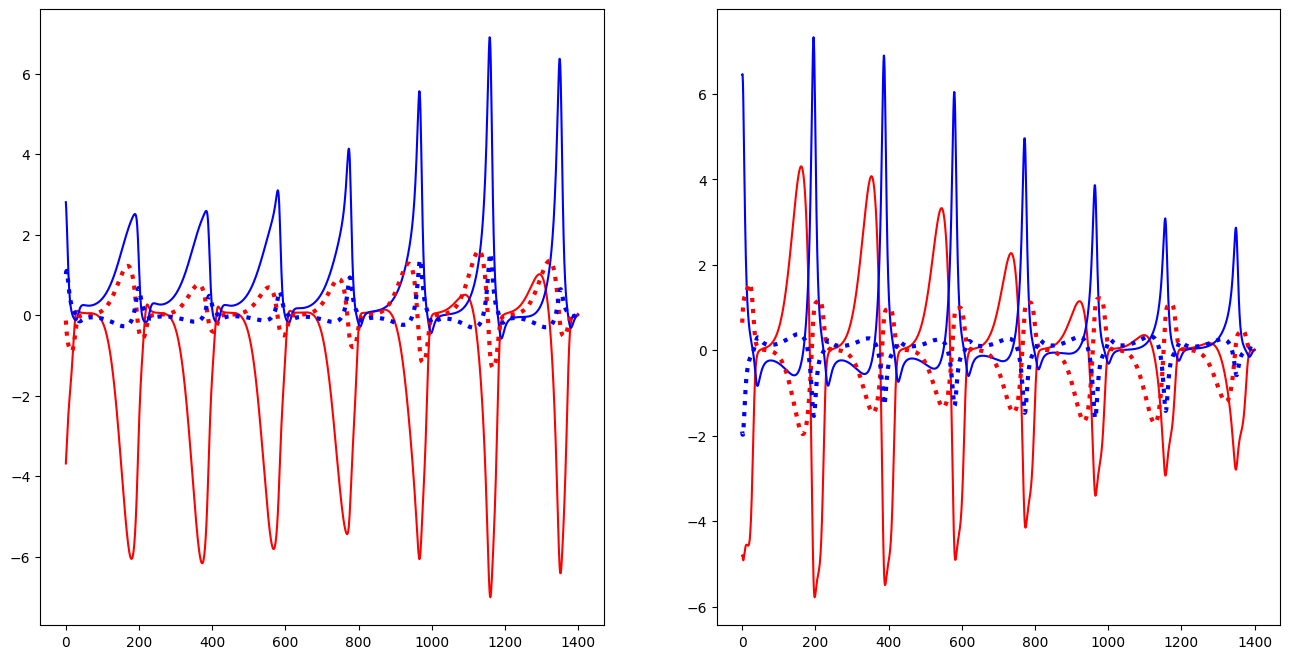

MAX GRADIENT =  7.3264440287790835
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -44.67173629158965
Converged in iteration 41 with cost -67.919767944063
Final cost : -67.919767944063
Compute control for a deterministic system
Cost in iteration 0: -67.919767944063
Converged in iteration 9 with cost -67.91976794406315
Final cost : -67.91976794406315
Compute control for a deterministic system
Cost in iteration 0: -67.91976794406315
Converged in iteration 2 with cost -67.91976794406315
Final cost : -67.91976794406315
Compute control for a deterministic system
Cost in iteration 0: -67.91976794406315
Converged in iteration 1 with cost -67.91976794406315
Final cost : -67.91976794406315
Compute control for a deterministic system
Cost in iteration 0: -67.91976794406315
Converged in iteration 3 with cost -67.91976794406315
Final cost : -67.91976794406315
Compute control for a deterministic system
Cost in iteration 0: -67.9197679440

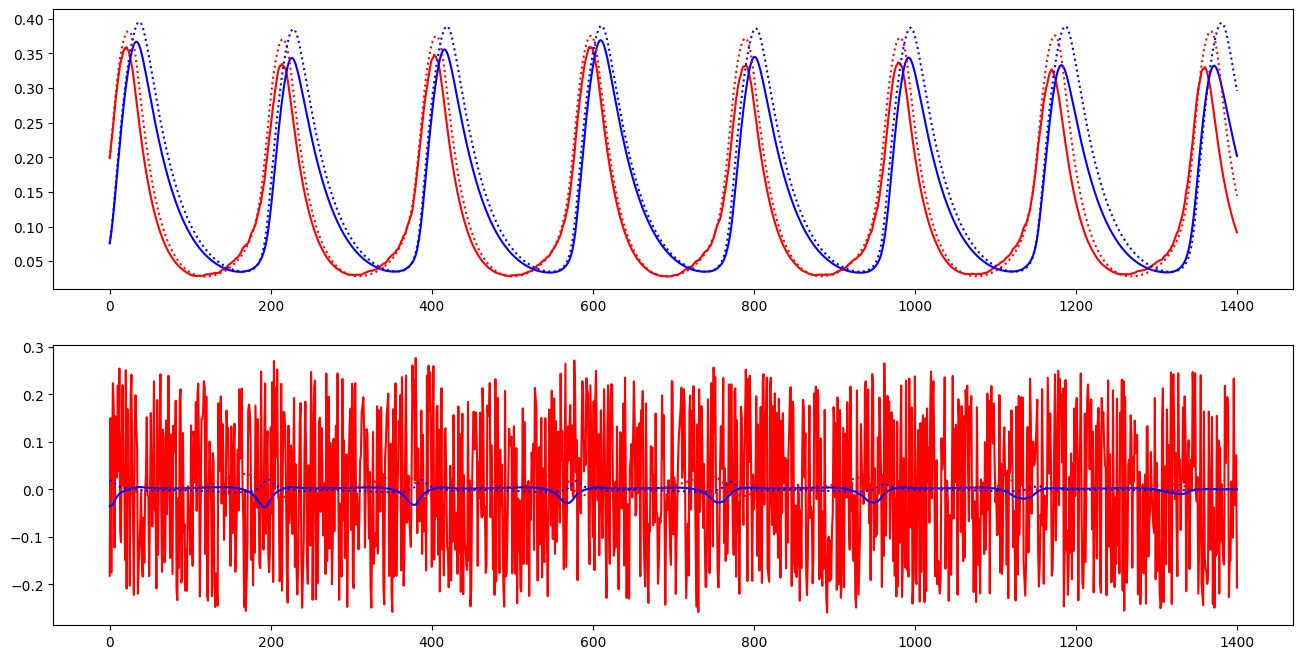

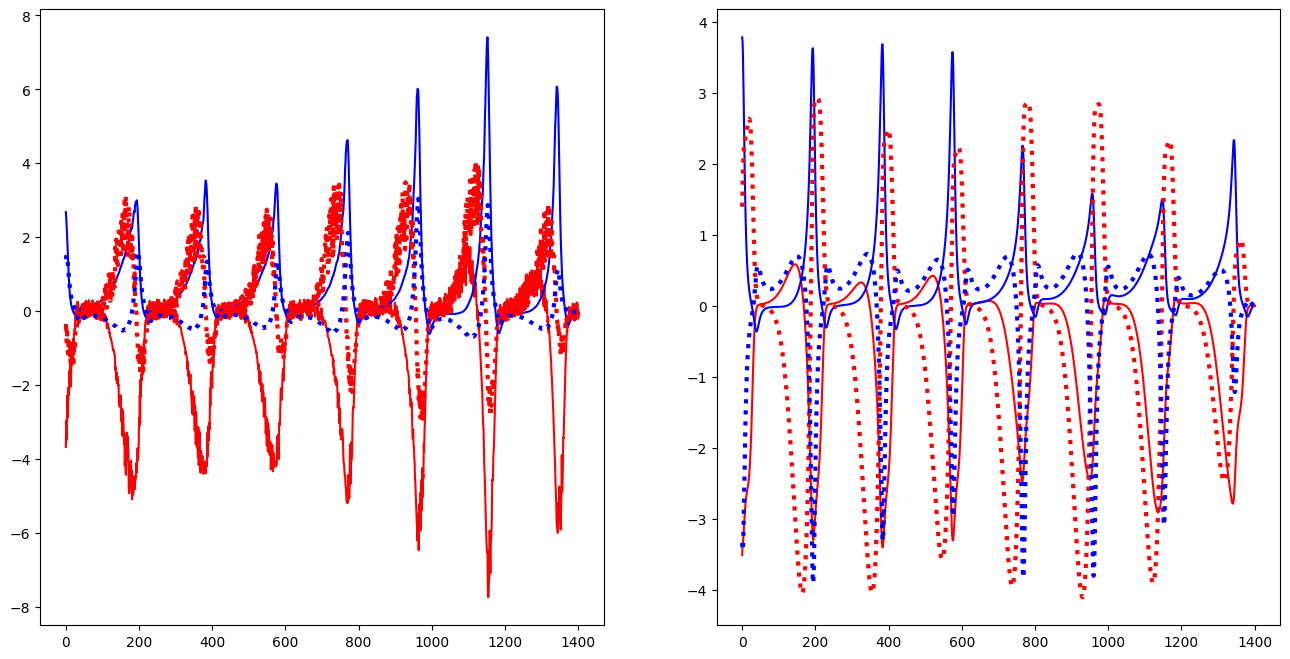

MAX GRADIENT =  7.749372547379384
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -44.01656588157889
Converged in iteration 51 with cost -63.38658577996184
Final cost : -63.38658577996184
Compute control for a deterministic system
Cost in iteration 0: -63.38658577996184
Converged in iteration 6 with cost -63.38658577996185
Final cost : -63.38658577996185
Compute control for a deterministic system
Cost in iteration 0: -63.38658577996185
Converged in iteration 4 with cost -63.38658577996186
Final cost : -63.38658577996186
Compute control for a deterministic system
Cost in iteration 0: -63.38658577996186
Converged in iteration 2 with cost -63.38658577996186
Final cost : -63.38658577996186
Compute control for a deterministic system
Cost in iteration 0: -63.38658577996186
Converged in iteration 1 with cost -63.38658577996186
Final cost : -63.38658577996186
Compute control for a deterministic system
Cost in iteration 0: -63.38658

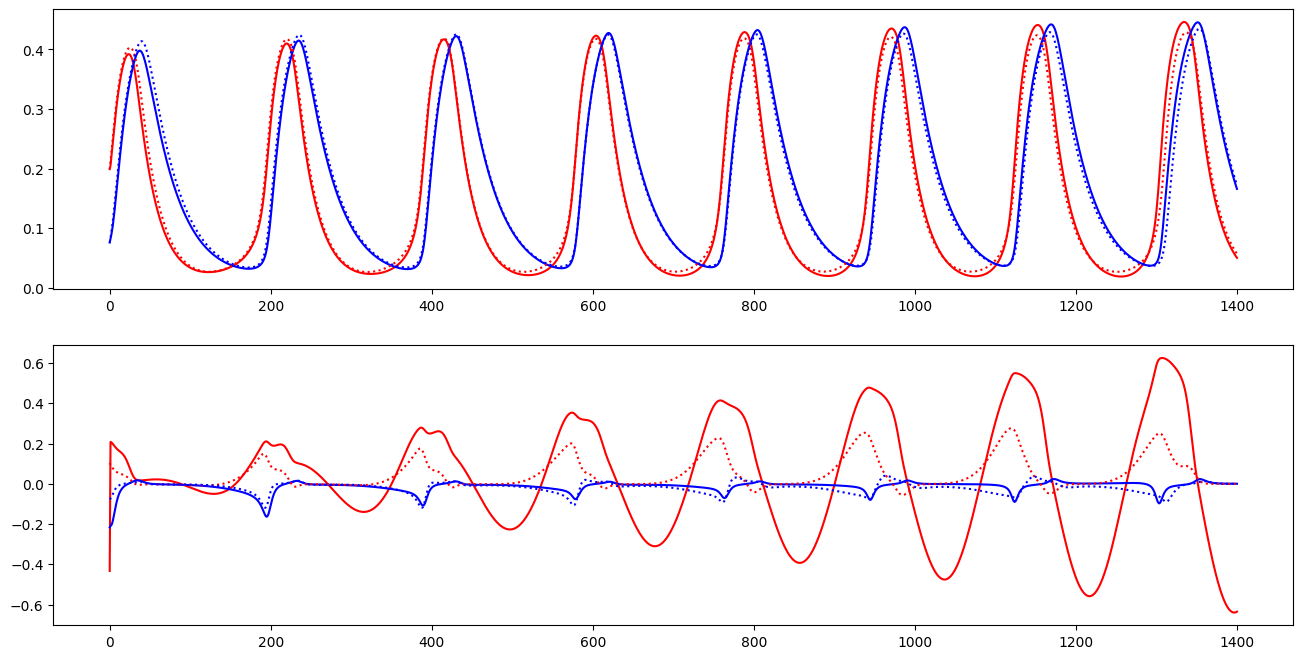

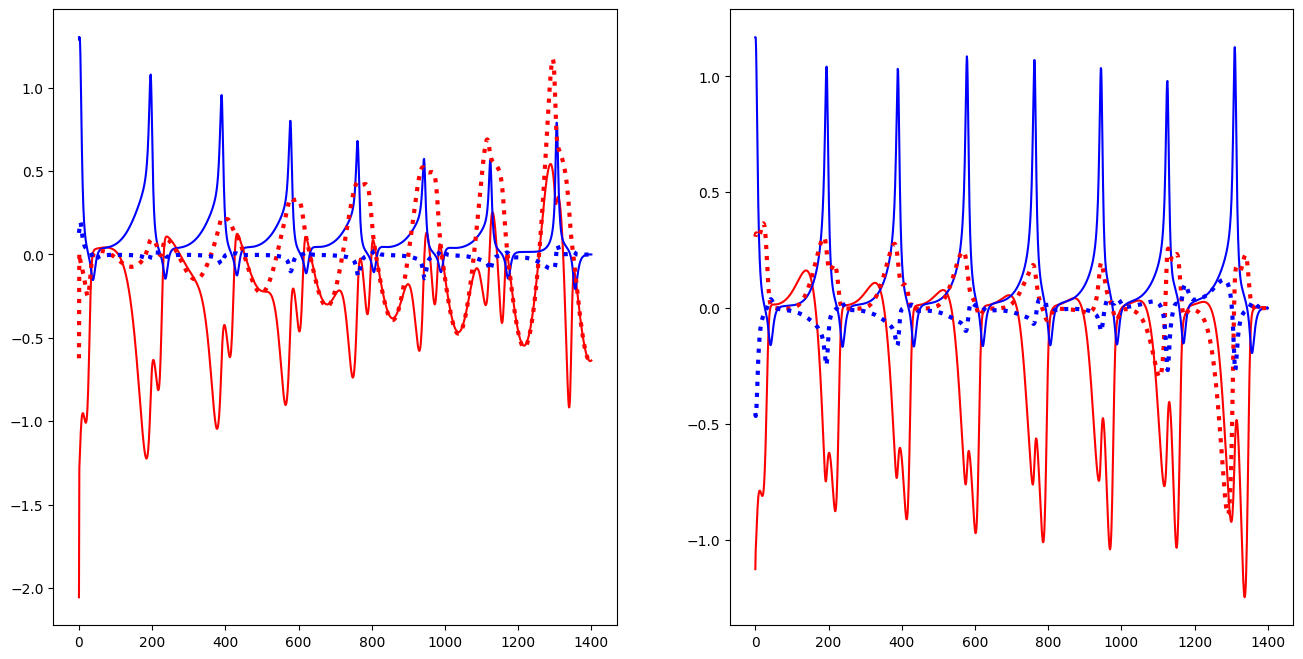

MAX GRADIENT =  2.055458958807592
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -36.57928246417368
Converged in iteration 88 with cost -60.22820560702033
Final cost : -60.22820560702033
Compute control for a deterministic system
Cost in iteration 0: -60.22820560702033
Converged in iteration 2 with cost -60.22820560702033
Final cost : -60.22820560702033
Compute control for a deterministic system
Cost in iteration 0: -60.22820560702033
Converged in iteration 2 with cost -60.22820560702033
Final cost : -60.22820560702033
Compute control for a deterministic system
Cost in iteration 0: -60.22820560702033
Converged in iteration 4 with cost -60.22820560702033
Final cost : -60.22820560702033
Compute control for a deterministic system
Cost in iteration 0: -60.22820560702033
Converged in iteration 1 with cost -60.22820560702033
Final cost : -60.22820560702033
Compute control for a deterministic system
Cost in iteration 0: -60.22820

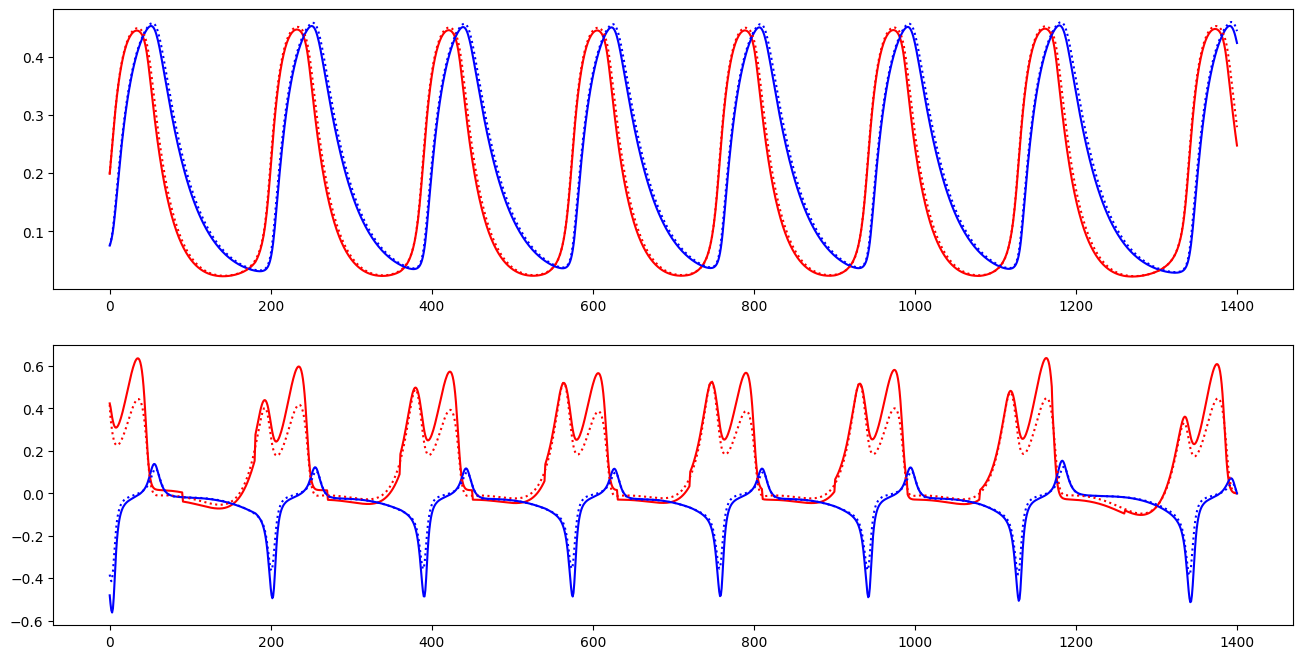

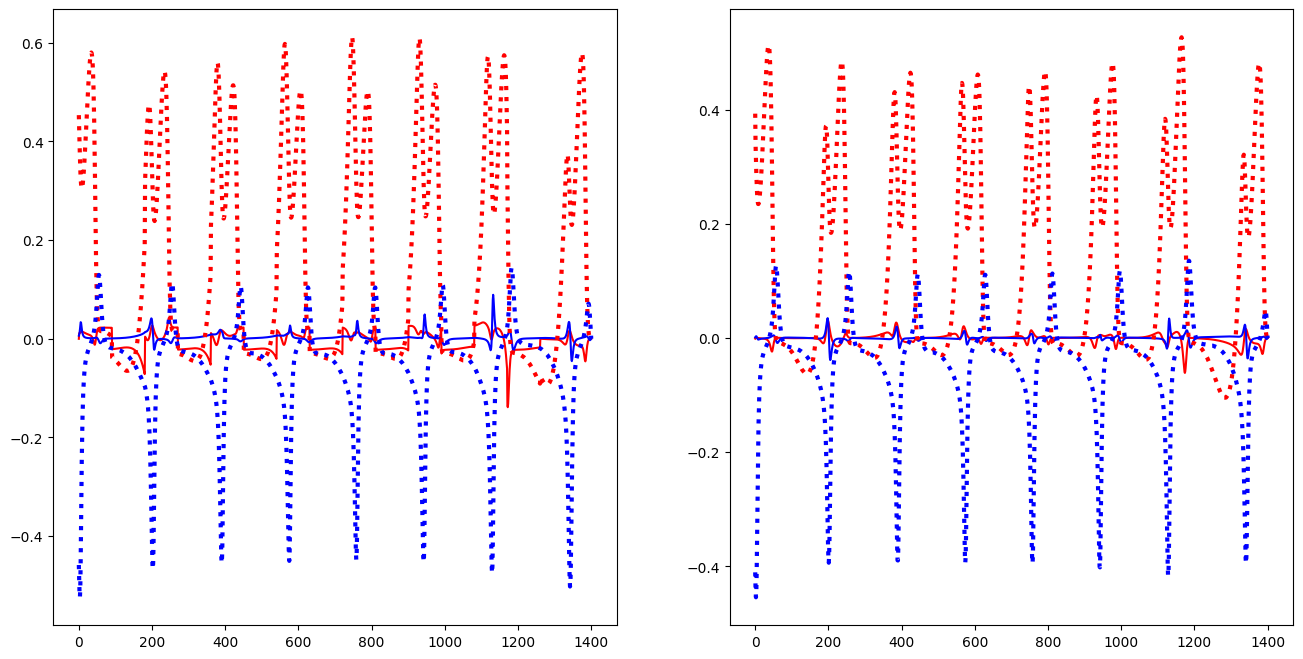

MAX GRADIENT =  0.13894820190454205
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -69.790264525162
Converged in iteration 38 with cost -69.79090161337098
Final cost : -69.79090161337098
Compute control for a deterministic system
Cost in iteration 0: -69.79090161337098
Converged in iteration 1 with cost -69.79090161337098
Final cost : -69.79090161337098
Compute control for a deterministic system
Cost in iteration 0: -69.79090161337098
Converged in iteration 1 with cost -69.79090161337098
Final cost : -69.79090161337098
Compute control for a deterministic system
Cost in iteration 0: -69.79090161337098
Converged in iteration 1 with cost -69.79090161337098
Final cost : -69.79090161337098
Compute control for a deterministic system
Cost in iteration 0: -69.79090161337098
Converged in iteration 3 with cost -69.79090161337102
Final cost : -69.79090161337102
Compute control for a deterministic system
Cost in iteration 0: -69.79090

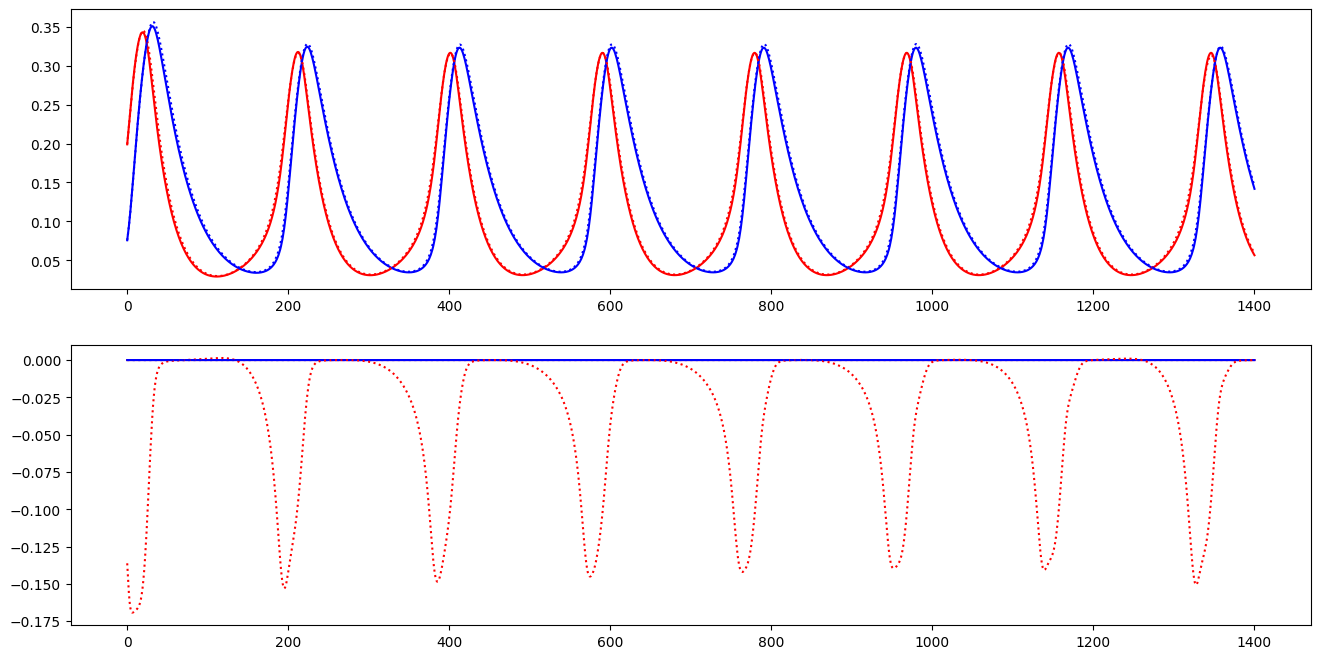

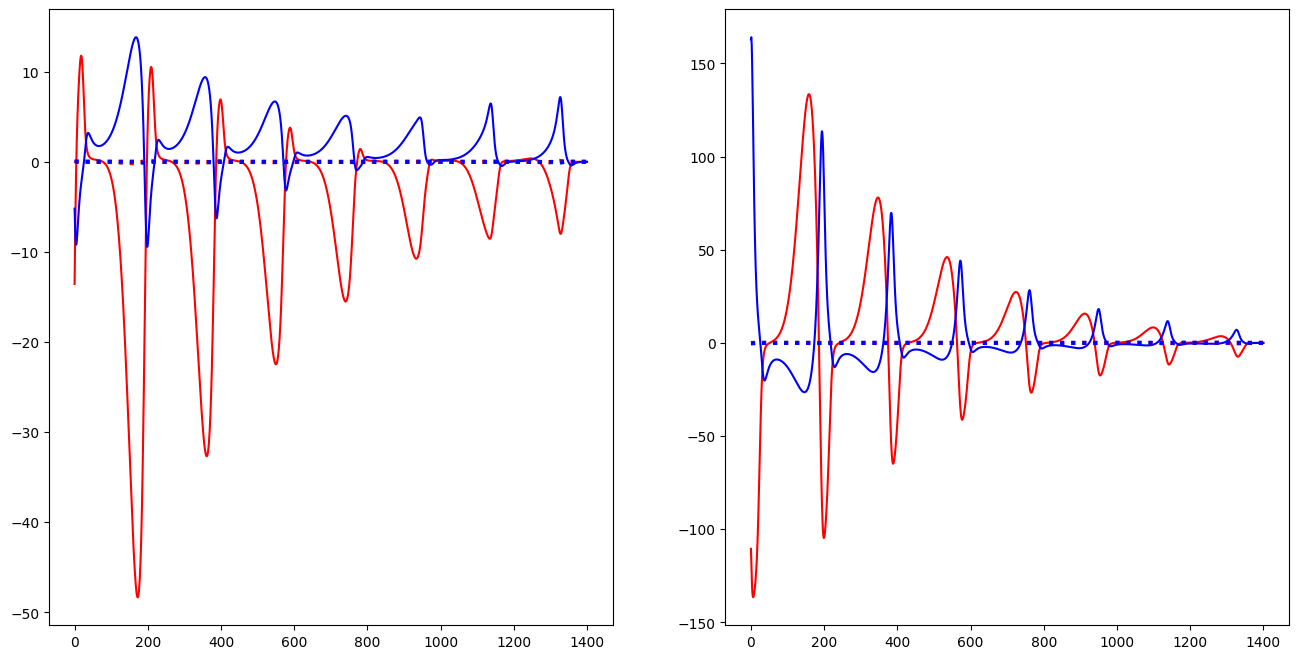

MAX GRADIENT =  164.07158327088288


In [33]:
for ui, u in enumerate(u_inits):

    #if ui not in [1]: continue
    
    fhn.params.x_ext = u[:,0,:]
    fhn.params.y_ext = u[:,1,:]

    fhn_controlled = oc_fhn.OcFhn(fhn, target_period, print_array=np.arange(0,1000,100),
                                  cost_interval=(0,None), control_interval=(0,None), grad_method=0)

    fhn_controlled.channelwise_optimization = False
    
    #for factor in np.random.random(6):
    for factor in [1]:

        fhn_controlled.weights["w_2"] = 1.
        fhn_controlled.weights["w_p"] = 0.
        fhn_controlled.weights["w_cc"] = 1. * factor

        if False:
            if type(res_control[fhn_controlled.grad_method][ui]) is not type(None):
                fhn_controlled.control = res_control[fhn_controlled.grad_method][ui].copy()
                fhn_controlled.update_input()
                fhn_controlled.optimize(1)

        fhn_controlled.grad_method = 0

        for k in range(1):
            for exp in np.arange(-15, 12, 2):
                fhn_controlled.zero_step_encountered = False
                fhn_controlled.step = 10.**exp
                fhn_controlled.optimize(100)

    fhn_controlled.grad_method = 0
    fhn_controlled.weights["w_cc"] = 1.

    for k in range(1):
        for exp in np.arange(-15, 12, 2):
            fhn_controlled.zero_step_encountered = False
            fhn_controlled.step = 10.**exp
            fhn_controlled.optimize(100)

    if True:
        res_cost[fhn_controlled.grad_method, ui] =  fhn_controlled.cost_history[-1]   
        res_control[fhn_controlled.grad_method][ui] = fhn_controlled.control.copy()
        res_state[fhn_controlled.grad_method][ui] = fhn_controlled.get_xs().copy()

    xs = fhn_controlled.get_xs()
    control = fhn_controlled.control.copy()

    fig, ax = plt.subplots(2,1, figsize=(16,8))
    ax[0].plot(xs[0,0,:], color="red")
    ax[0].plot(xs[0,1,:], color="blue")
    ax[0].plot(xs[1,0,:], color="red", linestyle=":")
    ax[0].plot(xs[1,1,:], color="blue", linestyle=":")

    ax[1].plot(control[0,0,:], color="red")
    ax[1].plot(control[0,1,:], color="blue")
    ax[1].plot(control[1,0,:], color="red", linestyle=":")
    ax[1].plot(control[1,1,:], color="blue", linestyle=":")
    plt.show()

    grad_num = fhn_controlled.compute_gradient_num()
    grad_an = fhn_controlled.compute_gradient()

    fig, ax = plt.subplots(1,2, figsize=(16,8))
    ax[0].plot(grad_an[0,0,:], color="red")
    ax[0].plot(grad_an[0,1,:], color="blue")
    ax[1].plot(grad_an[1,0,:], color="red")
    ax[1].plot(grad_an[1,1,:], color="blue")
    ax[0].plot(grad_num[0,0,:], color="red", linestyle=":", linewidth=3)
    ax[0].plot(grad_num[0,1,:], color="blue", linestyle=":", linewidth=3)
    ax[1].plot(grad_num[1,0,:], color="red", linestyle=":", linewidth=3)
    ax[1].plot(grad_num[1,1,:], color="blue", linestyle=":", linewidth=3)
    plt.show()

    print("MAX GRADIENT = ", np.amax(np.abs(fhn_controlled.gradient)))

In [34]:
print(res_cost)

[[-69.71704875 -67.91976794 -63.38658578 -60.22820561 -69.79090161]
 [  0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.        ]]


In [31]:
print(res_cost)

[[-69.72034555 -68.20248488 -63.40297526 -60.30963195 -69.79090151]
 [  0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.        ]]


In [8]:
print(res_cost)

[[-69.79107363 -68.24641283 -63.62666036 -63.21068776 -69.790905  ]
 [  0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.        ]]


0
1
2
3
4


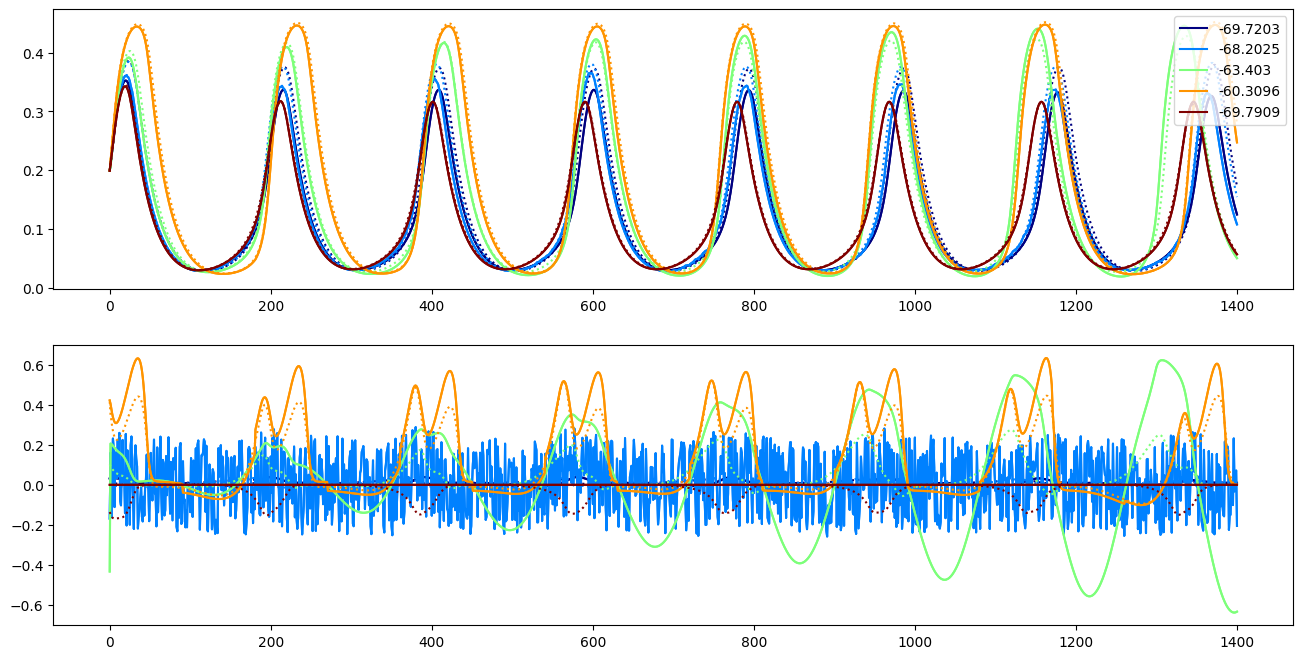

In [32]:
cmap = plt.cm.get_cmap("jet")
fig, ax = plt.subplots(2,1, figsize=(16,8))

gradmet = 0

for init_i in range(len(u_inits)):
    print(init_i)
    col = cmap(init_i/(len(u_inits)-1))
    xs = res_state[gradmet][init_i]
    control = res_control[gradmet][init_i]
    ax[0].plot(res_state[gradmet][init_i][0,0,:], color=col, label=np.around(res_cost[gradmet][init_i], 4))
    ax[1].plot(res_control[gradmet][init_i][0,0,:], color=col)

    
    ax[0].plot(xs[0,0,:], color=col)
    ax[0].plot(xs[1,0,:], color=col, linestyle=":")

    ax[1].plot(control[0,0,:], color=col)
    ax[1].plot(control[1,0,:], color=col, linestyle=":")

ax[0].legend(loc="upper right")
plt.show()


In [ ]:
for ui in range(len(u_inits)):
    amp = np.amax(res_control[ui][0,0,:]) - np.amin(res_control[ui][0,0,:])
    print(amp * fhn_controlled.weights["w_2"] * np.pi / fhn_controlled.weights["w_f"])

TypeError: list indices must be integers or slices, not tuple